In [1]:
#Импорты библиотек
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score, log_loss
from sklearn.linear_model import LinearRegression
from func import analize_df
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [2]:
#Загрузить датасет в Python.

df = pd.read_csv('WASDE-DATA.csv')

df.head()#код отчета_месяц регион товарная позиция год значение периода min_value max_value

,code,report_month,region,commodity,item,year,period,value,min_value,max_value
0,WHEAT_WORLD_19,2023-09,World Less China,Wheat,Production,2023/24 Proj.,Sep,650.34,NaN,NaN
1,WHEAT_WORLD_19,2023-09,World Less China,Wheat,Production,2023/24 Proj.,Aug,656.37,NaN,NaN
2,WHEAT_WORLD_19,2023-09,World Less China,Wheat,Imports,2023/24 Proj.,Sep,194.62,NaN,NaN
3,WHEAT_WORLD_19,2023-09,World Less China,Wheat,Imports,2023/24 Proj.,Aug,195.39,NaN,NaN
4,WHEAT_WORLD_19,2023-09,World Less China,Wheat,Exports,2023/24 Proj.,Sep,206.44,NaN,NaN


In [7]:
df['region'].value_counts()

World Less China      441
N. Africa 7/          441
Canada                441
China                 441
India                 441
Japan                 441
Kazakhstan            441
World 3/              441
Major Importers 6/    441
Major Exporters 4/    441
Nigeria               441
Russia                441
Sel. Mideast 8/       441
Southeast Asia 9/     441
Total Foreign         441
Ukraine               441
United States         441
Brazil                438
Bangladesh            427
Australia             427
Argentina             427
European Union 5/     385
United Kingdom        343
EU-27+UK 5/            56
Name: region, dtype: int64

In [8]:
#Извлекаем страны...
df=df[df['region'].isin(['Canada','China','United Kingdom','Argentina','Australia','Bangladesh','Brazil','United States','Ukraine','Russia','Nigeria','Kazakhstan','Japan','India'])]
analize_df(df)

dtypes
code             object
report_month     object
region           object
commodity        object
item             object
year             object
period           object
value           float64
min_value       float64
max_value       float64
dtype: object
shape
(6031, 10)
isnull
code               0
report_month       0
region             0
commodity          0
item               0
year               0
period             0
value              0
min_value       6031
max_value       6031
dtype: int64
value_counts


code 1 !!!!!!!!!!!!!!!!!!!!!!/
WHEAT_WORLD_19    6031
Name: code, dtype: int64


report_month 33 !!!!!!!!!!!!!!!!!!!!!!/
2023-09    196
2022-06    196
2021-06    196
2021-07    196
2021-08    196
2021-09    196
2021-10    196
2021-11    196
2021-12    196
2022-01    196
2023-08    196
2022-03    196
2022-02    196
2022-07    196
2022-12    196
2023-07    196
2023-04    196
2023-01    196
2023-06    196
2022-11    196
2022-10    196
2022-09    196
2022-08    196
2021-04    

In [9]:
#и требуемые нам цели
df=df[df['item'].isin(['Production','Imports','Exports','Domestic Feed'])]#,''
analize_df(df)

dtypes
code             object
report_month     object
region           object
commodity        object
item             object
year             object
period           object
value           float64
min_value       float64
max_value       float64
dtype: object
shape
(3447, 10)
isnull
code               0
report_month       0
region             0
commodity          0
item               0
year               0
period             0
value              0
min_value       3447
max_value       3447
dtype: int64
value_counts


code 1 !!!!!!!!!!!!!!!!!!!!!!/
WHEAT_WORLD_19    3447
Name: code, dtype: int64


report_month 33 !!!!!!!!!!!!!!!!!!!!!!/
2023-09    112
2022-06    112
2021-06    112
2021-07    112
2021-08    112
2021-09    112
2021-10    112
2021-11    112
2021-12    112
2022-01    112
2023-08    112
2022-03    112
2022-02    112
2022-07    112
2022-12    112
2023-07    112
2023-04    112
2023-01    112
2023-06    112
2022-11    112
2022-10    112
2022-09    112
2022-08    112
2021-04    

In [10]:
#Наши бухгалтера не любят считать одну операцию  дважды, так что избавляемся от дублей
df=df.drop_duplicates()

In [11]:
#бьём разнотипные операции по столбцам
i ='item'
index_array=df[i].value_counts().index.tolist()
df=df.join(pd.get_dummies(df[i])).drop(i, axis=1)
for ii in (index_array):
    df[i+"_"+ii+"_"+'value']=df[ii]*df['value']
    df=df.rename(columns={ii: i+"_"+ii})
df.head()

,code,report_month,region,commodity,year,period,value,min_value,max_value,item_Domestic Feed,item_Exports,item_Imports,item_Production,item_Production_value,item_Imports_value,item_Exports_value,item_Domestic Feed_value
28,WHEAT_WORLD_19,2023-09,United States,Wheat,2023/24 Proj.,Sep,47.20,NaN,NaN,0,0,0,1,47.2,0.00,0.00,0.0
29,WHEAT_WORLD_19,2023-09,United States,Wheat,2023/24 Proj.,Aug,47.20,NaN,NaN,0,0,0,1,47.2,0.00,0.00,0.0
30,WHEAT_WORLD_19,2023-09,United States,Wheat,2023/24 Proj.,Sep,3.54,NaN,NaN,0,0,1,0,0.0,3.54,0.00,0.0
31,WHEAT_WORLD_19,2023-09,United States,Wheat,2023/24 Proj.,Aug,3.54,NaN,NaN,0,0,1,0,0.0,3.54,0.00,0.0
32,WHEAT_WORLD_19,2023-09,United States,Wheat,2023/24 Proj.,Sep,19.05,NaN,NaN,0,1,0,0,0.0,0.00,19.05,0.0


In [12]:
df=df.drop(['code','commodity','year','report_month','period','min_value', 'max_value','value'], axis=1)
df.head()

,region,item_Domestic Feed,item_Exports,item_Imports,item_Production,item_Production_value,item_Imports_value,item_Exports_value,item_Domestic Feed_value
28,United States,0,0,0,1,47.2,0.00,0.00,0.0
29,United States,0,0,0,1,47.2,0.00,0.00,0.0
30,United States,0,0,1,0,0.0,3.54,0.00,0.0
31,United States,0,0,1,0,0.0,3.54,0.00,0.0
32,United States,0,1,0,0,0.0,0.00,19.05,0.0


In [13]:
#И сгребаем всё в кучку
df1=df.groupby([df['region']]).sum()
df1.head()

,item_Domestic Feed,item_Exports,item_Imports,item_Production,item_Production_value,item_Imports_value,item_Exports_value,item_Domestic Feed_value
region,,,,,,,,
Argentina,61,61,61,61,1127.38,0.39,756.50,3.45
Australia,61,61,61,61,1911.60,13.40,1403.00,280.40
Bangladesh,61,61,61,61,69.44,407.70,0.00,24.95
Brazil,62,63,63,63,510.55,400.10,130.25,36.90
Canada,63,63,63,63,1977.27,37.80,1455.90,248.20


In [14]:
#Приводим к коэфициентам чтобы модели было проще
for i in (index_array):
    df1['item_'+i+'_value']=df1['item_'+i+'_value']/df1['item_'+i]
    df1=df1.drop('item_'+i, axis=1)
df1

,item_Production_value,item_Imports_value,item_Exports_value,item_Domestic Feed_value
region,,,,
Argentina,18.481639,0.006393,12.401639,0.056557
Australia,31.337705,0.219672,23.000000,4.596721
Bangladesh,1.138361,6.683607,0.000000,0.409016
Brazil,8.103968,6.350794,2.067460,0.595161
Canada,31.385238,0.600000,23.109524,3.939683
China,136.729524,9.817460,0.944444,31.746032
India,107.800000,0.043333,3.815079,6.468254
Japan,1.083175,5.627778,0.295556,0.659524
Kazakhstan,13.254444,0.957143,7.934921,1.413492


In [15]:
#Столбцы для сравнения экспорта с импортом и их процент от потребления
df1['Exports-Imports']=df1['item_Exports_value']-df1['item_Imports_value']

df1['exp_from_dom_%']=(df1['item_Exports_value']/df1['item_Domestic Feed_value']*100)
df1['imp_from_dom_%']=(df1['item_Imports_value']/df1['item_Domestic Feed_value']*100)

df1

,item_Production_value,item_Imports_value,item_Exports_value,item_Domestic Feed_value,Exports-Imports,exp_from_dom_%,imp_from_dom_%
region,,,,,,,
Argentina,18.481639,0.006393,12.401639,0.056557,12.395246,21927.536232,11.304348
Australia,31.337705,0.219672,23.000000,4.596721,22.780328,500.356633,4.778887
Bangladesh,1.138361,6.683607,0.000000,0.409016,-6.683607,0.000000,1634.068136
Brazil,8.103968,6.350794,2.067460,0.595161,-4.283333,347.378156,1067.071020
Canada,31.385238,0.600000,23.109524,3.939683,22.509524,586.583400,15.229654
China,136.729524,9.817460,0.944444,31.746032,-8.873016,2.975000,30.925000
India,107.800000,0.043333,3.815079,6.468254,3.771746,58.981595,0.669939
Japan,1.083175,5.627778,0.295556,0.659524,-5.332222,44.813478,853.309266
Kazakhstan,13.254444,0.957143,7.934921,1.413492,6.977778,561.370017,67.714767


item_Production_value


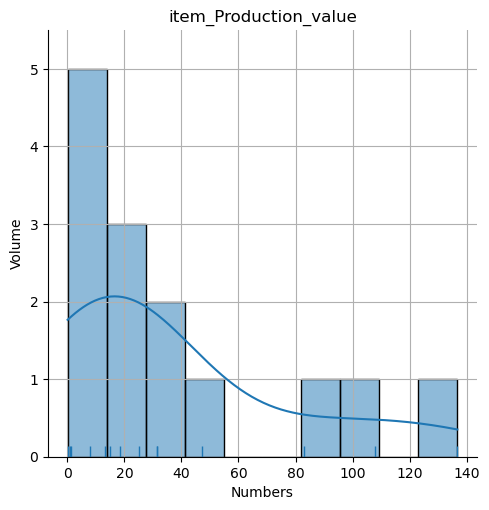

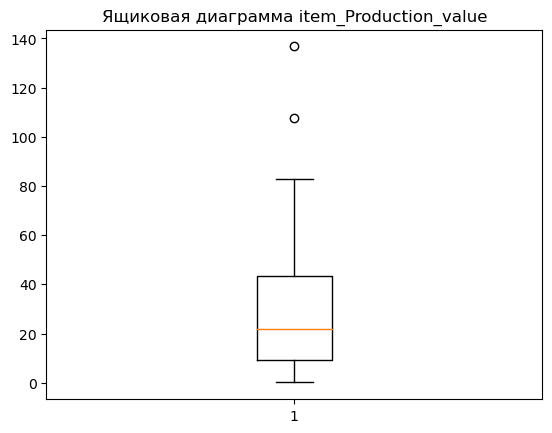

0.08793650793650794 9.391587301587302 37.11063619514941 43.25833333333333 136.72952380952378
Межквартильный размах: -41.40853174603175 94.05845238095239



item_Imports_value


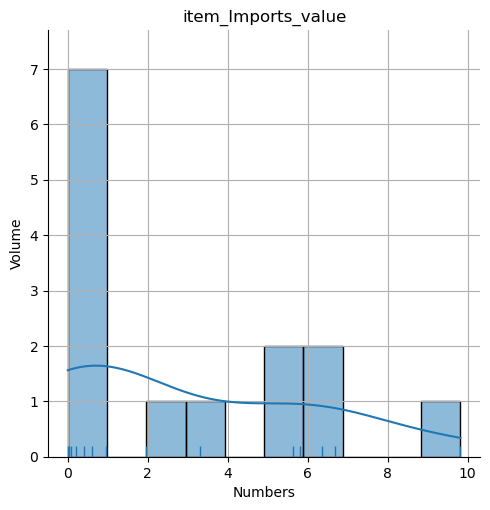

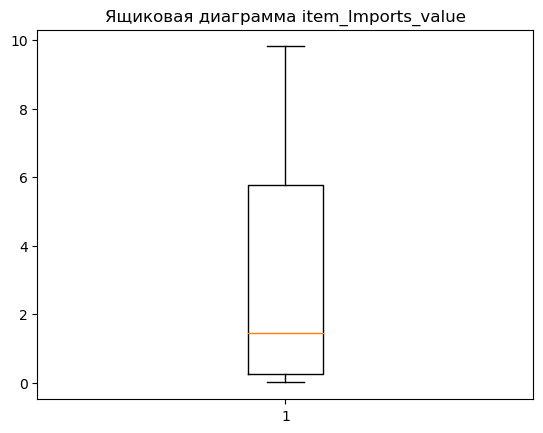

0.00639344262295082 0.26673822534478275 2.9923105620077846 5.760515873015873 9.817460317460318
Межквартильный размах: -7.973928246161853 14.001182344522508



item_Exports_value


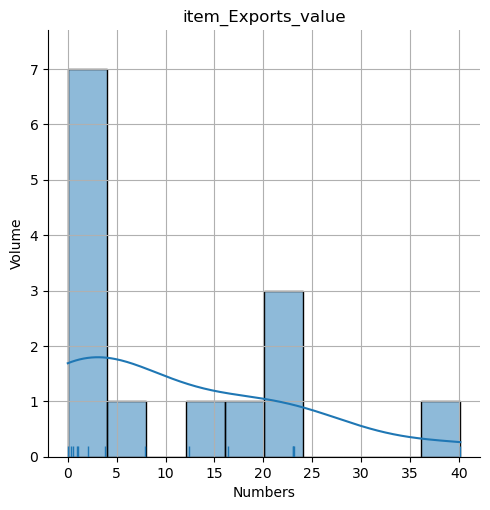

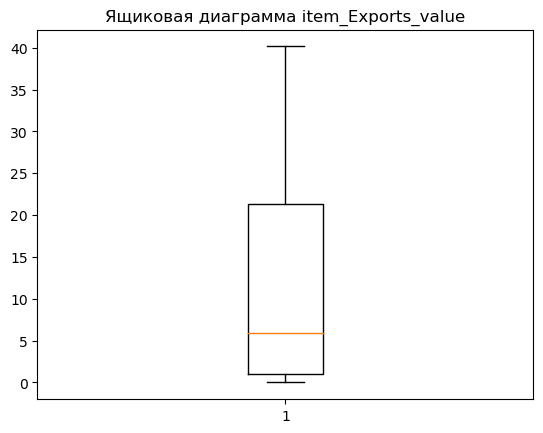

0.0 0.972108843537415 11.046116448140536 21.335873015873016 40.15079365079365
Межквартильный размах: -29.573537414965983 51.881519274376416



item_Domestic Feed_value


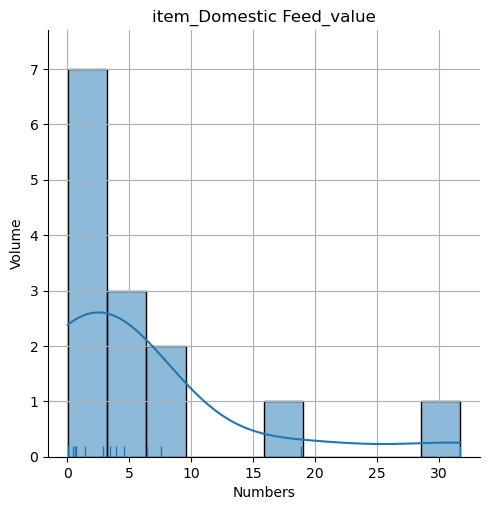

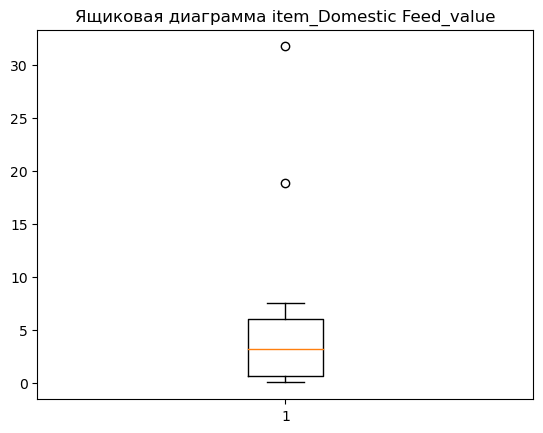

0.027777777777777776 0.6112519201228879 5.902861720145739 6.000370804059329 31.746031746031747
Межквартильный размах: -7.472426405781773 14.08404912996399



Exports-Imports


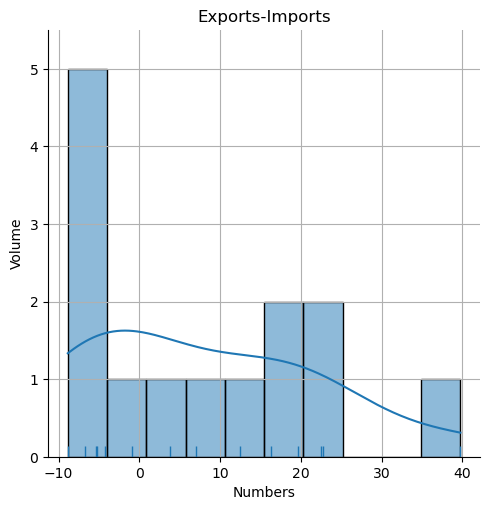

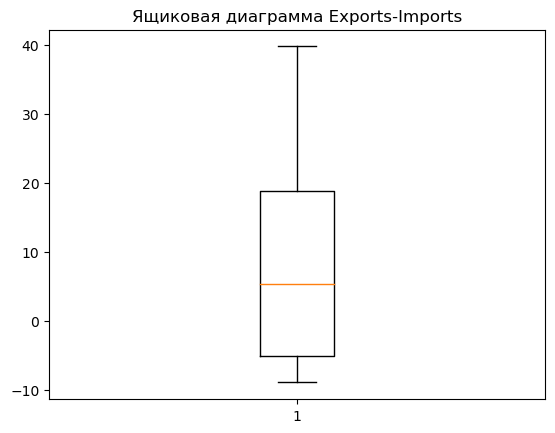

-8.873015873015873 -5.0339285714285715 8.053805886132752 18.83111111111111 39.74285714285715
Межквартильный размах: -40.8314880952381 54.62867063492064



exp_from_dom_%


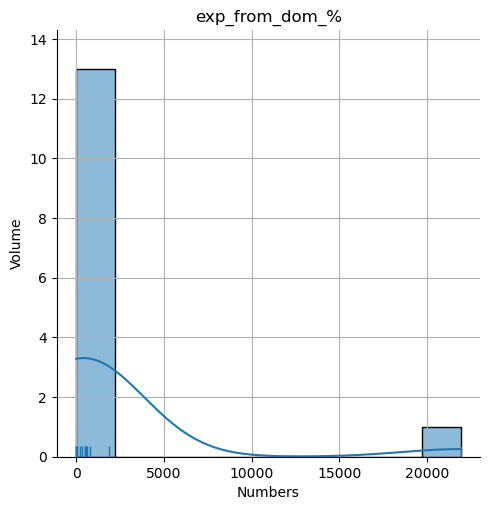

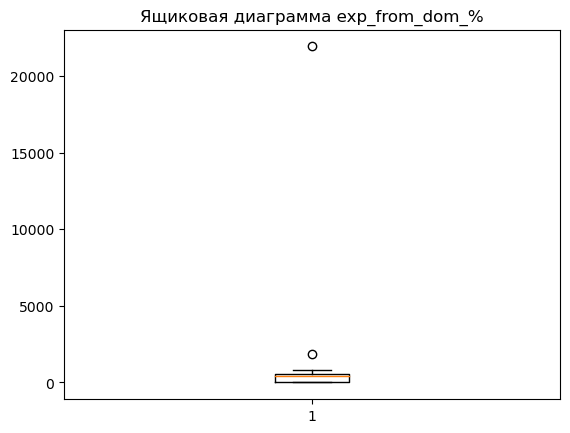

0.0 48.355507076255236 1957.905283360043 580.2800545737282 21927.536231884056
Межквартильный размах: -749.5313141699543 1378.1668758199376



imp_from_dom_%


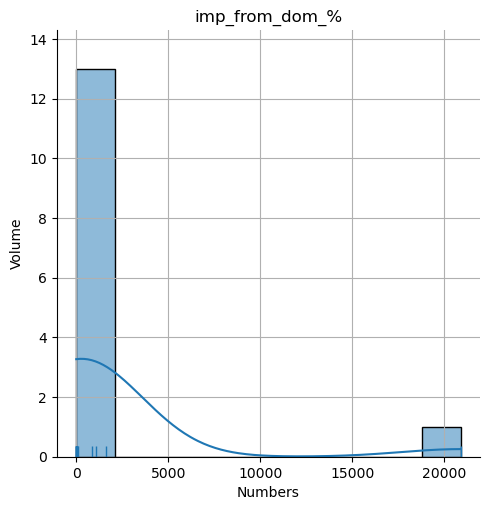

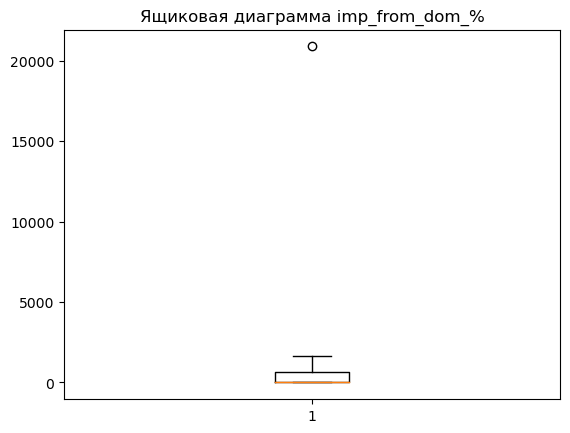

0.6699386503067485 6.41025243441047 1766.3404867208899 668.8937027448558 20897.14285714286
Межквартильный размах: -987.3149230312574 1662.6188782105237





In [16]:
#поиск выбросов
#Ищем и убираем выбросы
find_outliers(df1.columns,df1)

In [17]:
#Заменяем выбросы
df1=replace_outliers(df1,'item_Production_value', 0, 94.06)

item_Production_value
low 0.0
high 14.285714285714285
all 14.285714285714285


In [18]:
df1=df1.reset_index()
df1

,region,item_Production_value,item_Imports_value,item_Exports_value,item_Domestic Feed_value,Exports-Imports,exp_from_dom_%,imp_from_dom_%,item_Production_value_outlier
0,Argentina,18.481639,0.006393,12.401639,0.056557,12.395246,21927.536232,11.304348,0
1,Australia,31.337705,0.219672,23.000000,4.596721,22.780328,500.356633,4.778887,0
2,Bangladesh,1.138361,6.683607,0.000000,0.409016,-6.683607,0.000000,1634.068136,0
3,Brazil,8.103968,6.350794,2.067460,0.595161,-4.283333,347.378156,1067.071020,0
4,Canada,31.385238,0.600000,23.109524,3.939683,22.509524,586.583400,15.229654,0
5,China,94.060000,9.817460,0.944444,31.746032,-8.873016,2.975000,30.925000,1
6,India,94.060000,0.043333,3.815079,6.468254,3.771746,58.981595,0.669939,1
7,Japan,1.083175,5.627778,0.295556,0.659524,-5.332222,44.813478,853.309266,0
8,Kazakhstan,13.254444,0.957143,7.934921,1.413492,6.977778,561.370017,67.714767,0
9,Nigeria,0.087937,5.804762,0.520635,0.027778,-5.284127,1874.285714,20897.142857,0


In [19]:
df1['max_prod']=df1['item_Production_value'].max()
df1['max_dom']=df1['item_Domestic Feed_value'].max()
y_test=np.array((df1['Exports-Imports']<0)*1)

Выделить лидеров рынка по производству и по внутреннему потреблению. Оценить процент импорта/экспорта относительно внутреннего потребления.

[1 1 1 1 1 0 1 1 1 1 0 1 1 1]


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


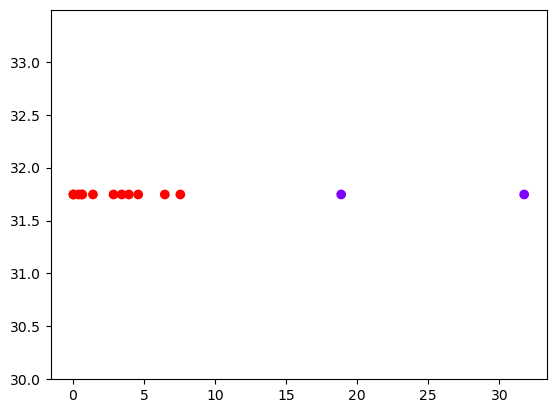

In [20]:
#Иерархическая кластеризация

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df1[['item_Domestic Feed_value','max_dom']])
print(cluster.labels_)#Exports-Imports
plt.scatter(df1['item_Domestic Feed_value'],df1['max_dom'], c=cluster.labels_, cmap='rainbow')

In [21]:
print('Лидеры внутреннего потребления')
for i in (df1[cluster.labels_==0].sort_values('item_Domestic Feed_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'потребление за период',df1.iloc[i]['item_Domestic Feed_value'])

Лидеры внутреннего потребления
Страна China потребление за период 31.746031746031747
Страна Russia потребление за период 18.873015873015873


[0 0 0 0 0 1 1 0 0 0 1 0 0 0]


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


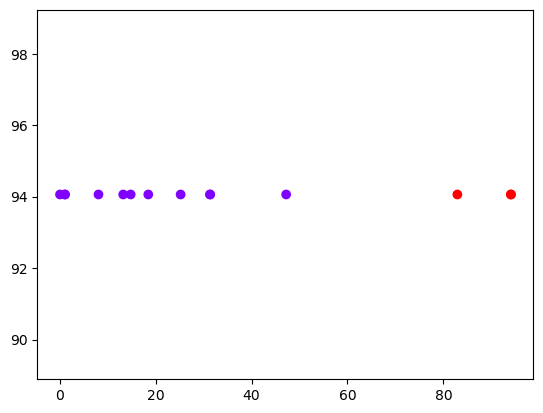

In [22]:
#Иерархическая кластеризация

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df1[['item_Production_value','max_prod']])
print(cluster.labels_)#Exports-Imports
plt.scatter(df1['item_Production_value'],df1['max_prod'], c=cluster.labels_, cmap='rainbow')

In [23]:
print('Лидеры производства')
for i in (df1[cluster.labels_==1].sort_values('item_Production_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'производство за период',df1.iloc[i]['item_Production_value'])

Лидеры производства
Страна China производство за период 94.06
Страна India производство за период 94.06
Страна Russia производство за период 82.89539682539683


Иерархическая кластеризация

In [24]:
#экспортёры
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df1[['item_Imports_value','item_Exports_value']])
print(cluster.labels_)#Exports-Imports

[0 0 1 1 0 1 1 1 1 1 0 0 1 0]


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


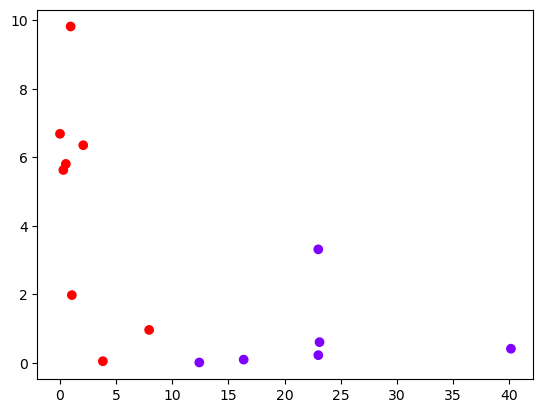

In [25]:
plt.scatter(df1['item_Exports_value'],df1['item_Imports_value'], c=cluster.labels_, cmap='rainbow')

In [26]:
print('экспортёры в абсолютных значениях')
for i in (df1[cluster.labels_==0].sort_values('item_Exports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт в абсолютных значениях',df1.iloc[i]['item_Exports_value'])


экспортёры в абсолютных значениях
Страна Russia экспорт в абсолютных значениях 40.15079365079365
Страна Canada экспорт в абсолютных значениях 23.10952380952381
Страна Australia экспорт в абсолютных значениях 23.0
Страна United States экспорт в абсолютных значениях 22.996507936507935
Страна Ukraine экспорт в абсолютных значениях 16.353968253968254
Страна Argentina экспорт в абсолютных значениях 12.401639344262295


In [27]:

print('экспортёры относительно потребления в %')
for i in (df1[cluster.labels_==0].sort_values('exp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт относительно потребления в %',df1.iloc[i]['exp_from_dom_%'])

экспортёры относительно потребления в %
Страна Argentina экспорт относительно потребления в % 21927.536231884056
Страна United States экспорт относительно потребления в % 803.5831160907426
Страна Canada экспорт относительно потребления в % 586.5834004834811
Страна Australia экспорт относительно потребления в % 500.3566333808845
Страна Ukraine экспорт относительно потребления в % 476.1090573012939
Страна Russia экспорт относительно потребления в % 212.74179983179144


In [28]:
print('импортёры в абсолютных значениях')
for i in (df1[cluster.labels_==1].sort_values('item_Imports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт в абсолютных значениях',df1.iloc[i]['item_Imports_value'])

импортёры в абсолютных значениях
Страна China импорт в абсолютных значениях 9.817460317460318
Страна Bangladesh импорт в абсолютных значениях 6.683606557377049
Страна Brazil импорт в абсолютных значениях 6.350793650793651
Страна Nigeria импорт в абсолютных значениях 5.804761904761905
Страна Japan импорт в абсолютных значениях 5.627777777777778
Страна United Kingdom импорт в абсолютных значениях 1.9734693877551022
Страна Kazakhstan импорт в абсолютных значениях 0.9571428571428571
Страна India импорт в абсолютных значениях 0.043333333333333335


In [29]:

print('импортёры относительно потребления в %')
for i in (df1[cluster.labels_==1].sort_values('imp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт относительно потребления в %',df1.iloc[i]['imp_from_dom_%'])

импортёры относительно потребления в %
Страна Nigeria импорт относительно потребления в % 20897.14285714286
Страна Bangladesh импорт относительно потребления в % 1634.0681362725452
Страна Brazil импорт относительно потребления в % 1067.0710199165485
Страна Japan импорт относительно потребления в % 853.3092659446451
Страна Kazakhstan импорт относительно потребления в % 67.71476698483998
Страна China импорт относительно потребления в % 30.925000000000004
Страна United Kingdom импорт относительно потребления в % 26.110436073984072
Страна India импорт относительно потребления в % 0.6699386503067485


In [30]:
y_pred=cluster.labels_

Создайте матрицу ошибок

F-мерa: 0.8571428571428571
Достоверность accuracy: 0.8571428571428571
Точность precision: 0.75
Полнота recall: 1.0


Text(0.5, 23.52222222222222, 'Предсказанные значения')

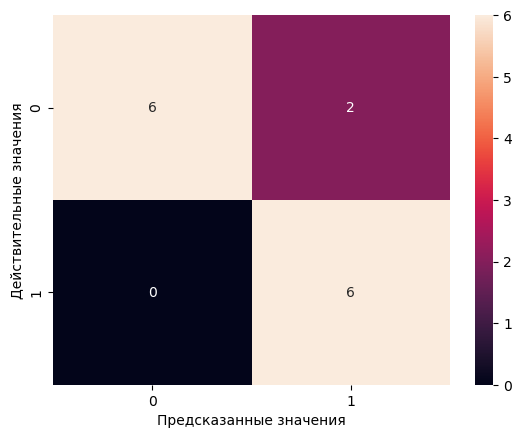

In [31]:

res_matrix = confusion_matrix(y_test, y_pred)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)),annot=True)


print(f'F-мерa: {f1_score(y_test, y_pred)}')
print(f'Достоверность accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Точность precision: {precision_score(y_true=y_test, y_pred=y_pred, average="binary", pos_label=1)}')
print(f'Полнота recall: {recall_score(y_test, y_pred, average="binary", pos_label=1)}')

plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

k-Means

[0 0 1 1 0 1 0 1 0 1 0 0 0 0]


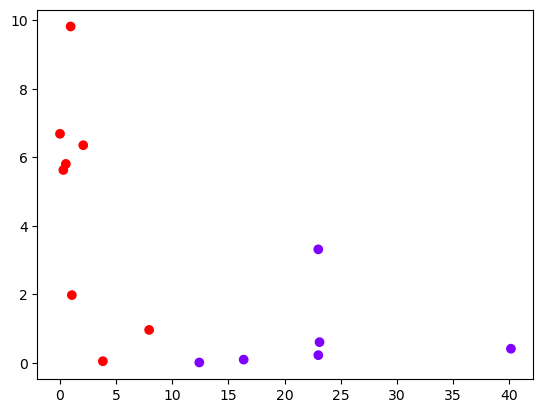

In [41]:

model = KNeighborsClassifier(n_neighbors = 1)
model.fit(df1[['item_Imports_value','item_Exports_value']][:-2],y_test[:-2])
y_pred_k=model.predict(df1[['item_Imports_value','item_Exports_value']][-2:])
y_pred_f=model.predict(df1[['item_Imports_value','item_Exports_value']])
print(y_pred_f)#Exports-Imports
plt.scatter(df1['item_Exports_value'],df1['item_Imports_value'], c=cluster.labels_, cmap='rainbow')

In [42]:
print('экспортёры в абсолютных значениях')
for i in (df1[y_pred_f==0].sort_values('item_Exports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт в абсолютных значениях',df1.iloc[i]['item_Exports_value'])



print('экспортёры относительно потребления в %')
for i in (df1[y_pred_f==0].sort_values('exp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт относительно потребления в %',df1.iloc[i]['exp_from_dom_%'])


print('импортёры в абсолютных значениях')
for i in (df1[y_pred_f==1].sort_values('item_Imports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт в абсолютных значениях',df1.iloc[i]['item_Imports_value'])



print('импортёры относительно потребления в %')
for i in (df1[y_pred_f==1].sort_values('imp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт относительно потребления в %',df1.iloc[i]['imp_from_dom_%'])

экспортёры в абсолютных значениях
Страна Russia экспорт в абсолютных значениях 40.15079365079365
Страна Canada экспорт в абсолютных значениях 23.10952380952381
Страна Australia экспорт в абсолютных значениях 23.0
Страна United States экспорт в абсолютных значениях 22.996507936507935
Страна Ukraine экспорт в абсолютных значениях 16.353968253968254
Страна Argentina экспорт в абсолютных значениях 12.401639344262295
Страна Kazakhstan экспорт в абсолютных значениях 7.934920634920634
Страна India экспорт в абсолютных значениях 3.815079365079365
Страна United Kingdom экспорт в абсолютных значениях 1.0551020408163265
экспортёры относительно потребления в %
Страна Argentina экспорт относительно потребления в % 21927.536231884056
Страна United States экспорт относительно потребления в % 803.5831160907426
Страна Canada экспорт относительно потребления в % 586.5834004834811
Страна Kazakhstan экспорт относительно потребления в % 561.3700168444694
Страна Australia экспорт относительно потребления в 

Создайте матрицу ошибок

F-мерa: 0.0
Достоверность accuracy: 0.5
Точность precision: 0.0
Полнота recall: 0.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 23.52222222222222, 'Предсказанные значения')

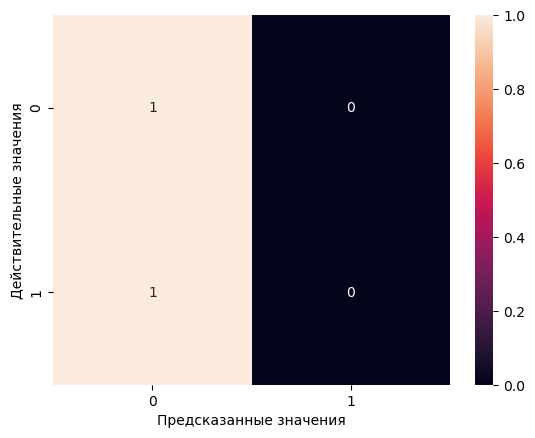

In [46]:


res_matrix = confusion_matrix(y_test[-2:], y_pred_k)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test[-2:], y_pred_k)),annot=True)


print(f'F-мерa: {f1_score(y_test[-2:], y_pred_k)}')
print(f'Достоверность accuracy: {accuracy_score(y_test[-2:], y_pred_k)}')
print(f'Точность precision: {precision_score(y_true=y_test[-2:], y_pred=y_pred_k, average="binary", pos_label=1)}')
print(f'Полнота recall: {recall_score(y_test[-2:], y_pred_k, average="binary", pos_label=1)}')

plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

DBSCAN


In [51]:
clustering = DBSCAN(eps=3,min_samples=4).fit(df1[['item_Imports_value','item_Exports_value']])#
y_pred_DBSCAN=clustering.labels_+1
print(y_pred_DBSCAN)

[0 0 1 1 0 0 0 1 0 1 0 0 0 0]


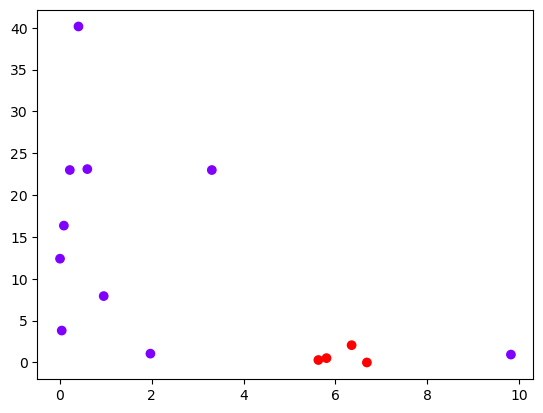

In [52]:
plt.scatter(df1['item_Imports_value'],df1['item_Exports_value'], c=clustering.labels_, cmap='rainbow')

In [53]:
print('экспортёры в абсолютных значениях')
for i in (df1[y_pred_DBSCAN==0].sort_values('item_Exports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт в абсолютных значениях',df1.iloc[i]['item_Exports_value'])



print('экспортёры относительно потребления в %')
for i in (df1[y_pred_DBSCAN==0].sort_values('exp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт относительно потребления в %',df1.iloc[i]['exp_from_dom_%'])


print('импортёры в абсолютных значениях')
for i in (df1[y_pred_DBSCAN==1].sort_values('item_Imports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт в абсолютных значениях',df1.iloc[i]['item_Imports_value'])



print('импортёры относительно потребления в %')
for i in (df1[y_pred_DBSCAN==1].sort_values('imp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт относительно потребления в %',df1.iloc[i]['imp_from_dom_%'])


экспортёры в абсолютных значениях
Страна Russia экспорт в абсолютных значениях 40.15079365079365
Страна Canada экспорт в абсолютных значениях 23.10952380952381
Страна Australia экспорт в абсолютных значениях 23.0
Страна United States экспорт в абсолютных значениях 22.996507936507935
Страна Ukraine экспорт в абсолютных значениях 16.353968253968254
Страна Argentina экспорт в абсолютных значениях 12.401639344262295
Страна Kazakhstan экспорт в абсолютных значениях 7.934920634920634
Страна India экспорт в абсолютных значениях 3.815079365079365
Страна United Kingdom экспорт в абсолютных значениях 1.0551020408163265
Страна China экспорт в абсолютных значениях 0.9444444444444444

экспортёры относительно потребления в %
Страна Argentina экспорт относительно потребления в % 21927.536231884056
Страна United States экспорт относительно потребления в % 803.5831160907426
Страна Canada экспорт относительно потребления в % 586.5834004834811
Страна Kazakhstan экспорт относительно потребления в % 561.37

Создайте матрицу ошибок

F-мерa: 0.8
Достоверность accuracy: 0.8571428571428571
Точность precision: 1.0
Полнота recall: 0.6666666666666666


Text(0.5, 23.52222222222222, 'Предсказанные значения')

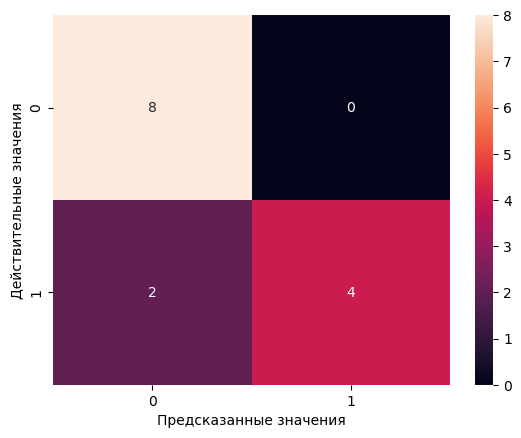

In [55]:
res_matrix = confusion_matrix(y_test, y_pred_DBSCAN)
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_DBSCAN)),annot=True)


print(f'F-мерa: {f1_score(y_test, y_pred_DBSCAN)}')
print(f'Достоверность accuracy: {accuracy_score(y_test, y_pred_DBSCAN)}')
print(f'Точность precision: {precision_score(y_true=y_test, y_pred=y_pred_DBSCAN, average="binary", pos_label=1)}')
print(f'Полнота recall: {recall_score(y_test, y_pred_DBSCAN, average="binary", pos_label=1)}')

plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')


AUC-ROC (или ROC AUC)

In [59]:
print('AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve )')
fpr_, tpr_, treshold_ = roc_curve(y_test, y_pred)
roc_auc_ = auc(fpr_, tpr_)
print('Иерархическая кластеризация',roc_auc_)

fpr_k, tpr_k, treshold_k = roc_curve(y_test, y_pred_f)  
roc_auc_k = auc(fpr_k, tpr_k)
print('k-Means',roc_auc_k)

fpr_kk, tpr_kk, treshold_kk = roc_curve(y_test[-2:], y_pred_k)  
roc_auc_kk = auc(fpr_kk, tpr_kk)
print('k-Means (split)',roc_auc_kk)

fpr_DBSCAN, tpr_DBSCAN, treshold_DBSCAN = roc_curve(y_test, y_pred_DBSCAN)
roc_auc_DBSCAN = auc(fpr_DBSCAN, tpr_DBSCAN)
print('DBSCAN',roc_auc_DBSCAN)

AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve )
Иерархическая кластеризация 0.875
k-Means 0.9166666666666667
k-Means (split) 0.5
DBSCAN 0.8333333333333333


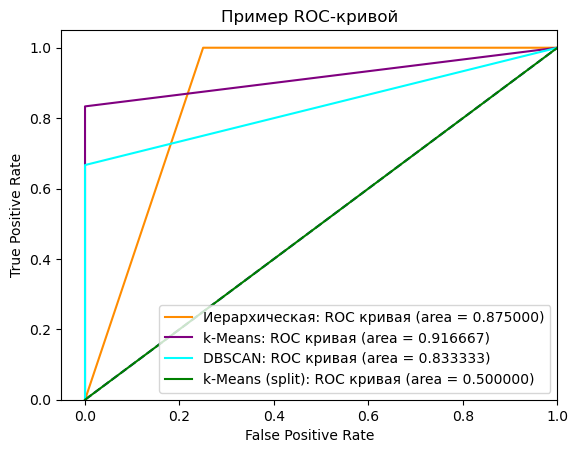

In [61]:
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.plot(fpr_, tpr_, color='darkorange', label='Иерархическая: ROC кривая (area = %0.6f)' % roc_auc_)
plt.plot(fpr_k, tpr_k, color='purple', label='k-Means: ROC кривая (area = %0.6f)' % roc_auc_k)
plt.plot(fpr_DBSCAN, tpr_DBSCAN, color='cyan', label='DBSCAN: ROC кривая (area = %0.6f)' % roc_auc_DBSCAN)
plt.plot(fpr_kk, tpr_kk, color='green', label='k-Means (split): ROC кривая (area = %0.6f)' % roc_auc_kk)


plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()

Logistic Loss

In [62]:

print('Иерархическая кластеризация',log_loss(y_test, y_pred))

print('k-Means',log_loss(y_test, y_pred_f))

print('k-Means (split)',log_loss(y_test[-2:], y_pred_k))

print('DBSCAN',log_loss(y_test, y_pred_DBSCAN))

Иерархическая кластеризация 5.149093341302451
k-Means 2.5745466706512254
k-Means (split) 18.021826694558577
DBSCAN 5.149093341302451


In [63]:
print('Иерархическая кластеризация')
print('экспортёры в абсолютных значениях')
for i in (df1[y_pred==0].sort_values('item_Exports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт в абсолютных значениях',df1.iloc[i]['item_Exports_value'])



print('экспортёры относительно потребления в %')
for i in (df1[y_pred==0].sort_values('exp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт относительно потребления в %',df1.iloc[i]['exp_from_dom_%'])


print('импортёры в абсолютных значениях')
for i in (df1[y_pred==1].sort_values('item_Imports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт в абсолютных значениях',df1.iloc[i]['item_Imports_value'])



print('импортёры относительно потребления в %')
for i in (df1[y_pred==1].sort_values('imp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт относительно потребления в %',df1.iloc[i]['imp_from_dom_%'])


Иерархическая кластеризация
экспортёры в абсолютных значениях
Страна Russia экспорт в абсолютных значениях 40.15079365079365
Страна Canada экспорт в абсолютных значениях 23.10952380952381
Страна Australia экспорт в абсолютных значениях 23.0
Страна United States экспорт в абсолютных значениях 22.996507936507935
Страна Ukraine экспорт в абсолютных значениях 16.353968253968254
Страна Argentina экспорт в абсолютных значениях 12.401639344262295

экспортёры относительно потребления в %
Страна Argentina экспорт относительно потребления в % 21927.536231884056
Страна United States экспорт относительно потребления в % 803.5831160907426
Страна Canada экспорт относительно потребления в % 586.5834004834811
Страна Australia экспорт относительно потребления в % 500.3566333808845
Страна Ukraine экспорт относительно потребления в % 476.1090573012939
Страна Russia экспорт относительно потребления в % 212.74179983179144

импортёры в абсолютных значениях
Страна China импорт в абсолютных значениях 9.817460

In [64]:
print('k-Means')
print('экспортёры в абсолютных значениях')
for i in (df1[y_pred_f==0].sort_values('item_Exports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт в абсолютных значениях',df1.iloc[i]['item_Exports_value'])



print('экспортёры относительно потребления в %')
for i in (df1[y_pred_f==0].sort_values('exp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'экспорт относительно потребления в %',df1.iloc[i]['exp_from_dom_%'])


print('импортёры в абсолютных значениях')
for i in (df1[y_pred_f==1].sort_values('item_Imports_value', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт в абсолютных значениях',df1.iloc[i]['item_Imports_value'])



print('импортёры относительно потребления в %')
for i in (df1[y_pred_f==1].sort_values('imp_from_dom_%', ascending=False).index):
    print('Страна',df1.iloc[i]['region'], 'импорт относительно потребления в %',df1.iloc[i]['imp_from_dom_%'])


k-Means
экспортёры в абсолютных значениях
Страна Russia экспорт в абсолютных значениях 40.15079365079365
Страна Canada экспорт в абсолютных значениях 23.10952380952381
Страна Australia экспорт в абсолютных значениях 23.0
Страна United States экспорт в абсолютных значениях 22.996507936507935
Страна Ukraine экспорт в абсолютных значениях 16.353968253968254
Страна Argentina экспорт в абсолютных значениях 12.401639344262295
Страна Kazakhstan экспорт в абсолютных значениях 7.934920634920634
Страна India экспорт в абсолютных значениях 3.815079365079365
Страна United Kingdom экспорт в абсолютных значениях 1.0551020408163265

экспортёры относительно потребления в %
Страна Argentina экспорт относительно потребления в % 21927.536231884056
Страна United States экспорт относительно потребления в % 803.5831160907426
Страна Canada экспорт относительно потребления в % 586.5834004834811
Страна Kazakhstan экспорт относительно потребления в % 561.3700168444694
Страна Australia экспорт относительно потре